In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# lets check the titanic data set from kaggel.com

In [2]:
titanic_train = pd.read_csv('../Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


lets check the null fields via visualization lib

In [5]:
isnull = titanic_train.isnull()
isnull

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


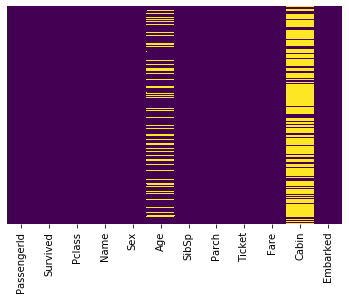

In [6]:
sns.heatmap(data=isnull,yticklabels=False,cbar=False,cmap='viridis')

In [7]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
sns.set_style('whitegrid')

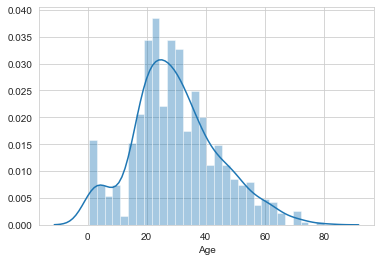

In [9]:
sns.distplot(titanic_train['Age'],bins=30)

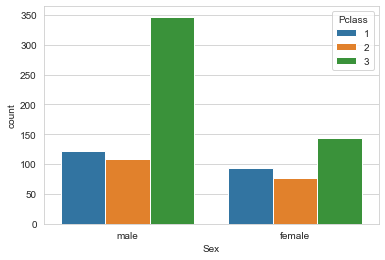

In [10]:
sns.countplot(data=titanic_train,x=titanic_train['Sex'],hue='Pclass')

# lets check how many survived

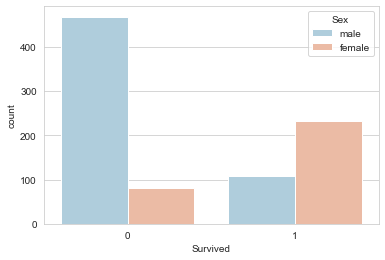

In [11]:
sns.countplot(data=titanic_train,x='Survived',hue='Sex',palette='RdBu_r')

lets fill the null value of age and try for others also

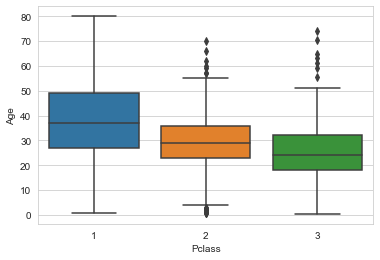

In [12]:
sns.boxplot(x='Pclass',y='Age',data=titanic_train)

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

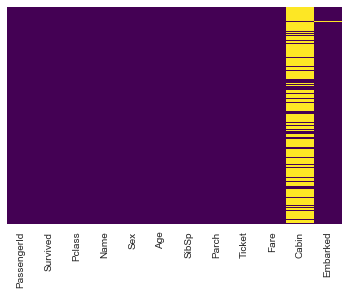

In [15]:
sns.heatmap(data=titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
titanic_train.drop(columns='Cabin',inplace=True)

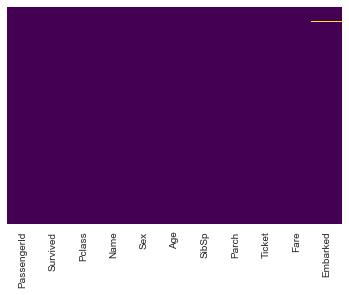

In [17]:
sns.heatmap(data=titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
titanic_train.dropna(inplace=True)

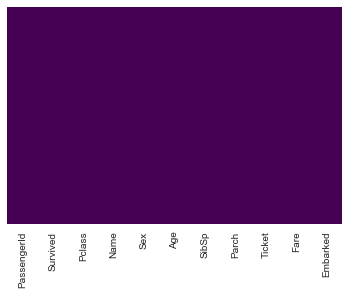

In [19]:
sns.heatmap(data=titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
titanic_train = pd.concat([titanic_train,pd.get_dummies(titanic_train['Sex'],drop_first=True)],axis=1).head()

In [37]:
titanic_train.drop('Sex',axis=1,inplace=True)

In [38]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


In [41]:
titanic_train.drop(['Name','Ticket'],axis=1,inplace=True)

In [46]:
titanic_train = pd.concat([titanic_train,pd.get_dummies(titanic_train['Embarked'],drop_first=True)],axis=1)

In [84]:
titanic_train.drop('Embarked',axis=1,inplace=True)

KeyError: "['Embarked'] not found in axis"

In [85]:
titanic_train.drop('PassengerId',axis=1,inplace=True)

In [86]:
X = titanic_train.drop('Survived',axis=1)

In [87]:
y = titanic_train['Survived']

In [106]:
y

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logmodel = LogisticRegression(max_iter=1000)

In [97]:
logmodel.fit(X_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [98]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,S
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,1,1
